# protostars
## 11- Surface gravity versus effective temperature *results*
### I. Doppman, Greene, Covey, and Lada

Table 3 from this paper:  
Title: The Physical Natures of Class I and Flat-Spectrum Protostellar 
       Photospheres: A Near-Infrared Spectroscopic Study  
Authors: Doppmann G.W., Greene T.P., Covey K.R., Lada C.J. 

We will also use data from Cottaar et al. 2014.


http://iopscience.iop.org/article/10.1086/431954/pdf

In [1]:
import pandas as pd
from astropy.io import ascii

In [2]:
cott = pd.read_csv('/Users/gully/GitHub/ApJdataFrames/data/Cottaar2014/per_star.csv')

In [3]:
tbl3_raw = ascii.read('http://iopscience.iop.org/article/10.1086/431954/fulltext/datafile3.txt')

In [4]:
#tbl3_raw[0:4]

In [5]:
tbl3 = tbl3_raw.to_pandas()

In [6]:
#tbl3.head()

In [7]:
from isochrones.bcah2002 import BCAH2002_Isochrone

In [8]:
bcah = BCAH2002_Isochrone()

In [9]:
sns.set_context('talk')
sns.set_style('ticks')

In [10]:
Teff_hi = tbl3['E_Teff']
Teff_lo = tbl3['e_Teff']

In [11]:
Teff_lo[Teff_lo.isnull()] = Teff_hi[Teff_lo.isnull()]

/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [12]:
Teff_err = np.vstack([Teff_hi, Teff_lo])

In [13]:
logg_hi = tbl3['E_log(g)']
logg_lo = tbl3['e_log(g)']
logg_lo[logg_lo.isnull()] = logg_hi[logg_lo.isnull()]
logg_err = np.vstack([logg_hi, logg_lo])

/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [14]:
from matplotlib.patches import Ellipse

In [15]:
cott.Cluster.unique()

array(['IC 348', 'Pleiades'], dtype=object)

In [16]:
cmap1 = sns.cubehelix_palette(light=1, as_cmap=True)
cmap2 = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)
color_dict = {'IC 348':cmap1, 'Pleiades':cmap2}

## Read in the *results*

In [17]:
ws = np.load("../sf/exp4/output/bb_absolute/run01/emcee_chain.npy")

In [18]:
burned = ws[:, -1000:,:]
xs, ys, zs = burned.shape
fc = burned.reshape(xs*ys, zs)
nx, ny = fc.shape

### Compare the experiments

In [19]:
ws2 = np.load("../sf/exp3/output/bb_absolute/run01/emcee_chain.npy")

In [20]:
burned2 = ws2[:, -1000:,:]
xs2, ys2, zs2 = burned2.shape
fc2 = burned2.reshape(xs2*ys2, zs2)
nx2, ny2 = fc2.shape

In [21]:
sns.set_context('paper')

In [23]:
cmap = sns.cubehelix_palette(8, start=2.5, rot=0, dark=0, light=.95, reverse=False, as_cmap=True)
#sns.palplot()

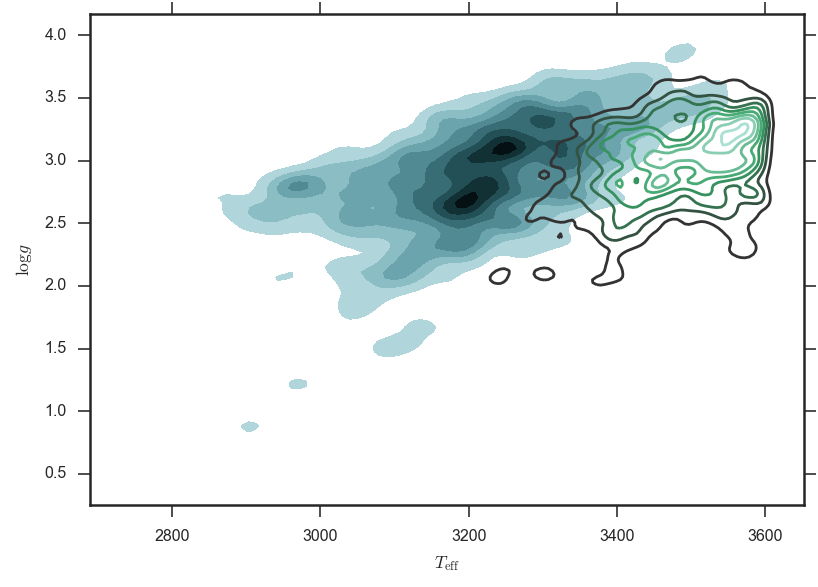

In [25]:
sns.kdeplot(fc[:,0], fc[:,1], shade=True, shade_lowest=False, cmap=cmap) ## Just the CO portion
sns.kdeplot(fc2[:,0], fc2[:,1], shade=False) ## Full spectrum
plt.xlabel('$T_{\mathrm{eff}}$')
plt.ylabel('$\log{g}$')

### Place a theory panel next to an observational panel.

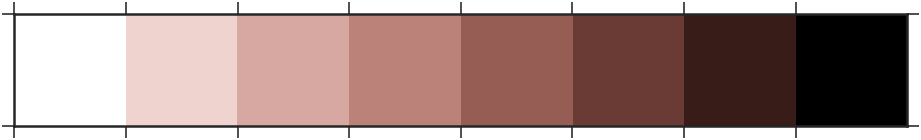

In [26]:
sns.palplot(sns.cubehelix_palette(8, start=1, rot=0, dark=0, light=1, reverse=False))
cmap2 = sns.cubehelix_palette(8, start=1, rot=0, dark=0, light=1, reverse=False, as_cmap=True)

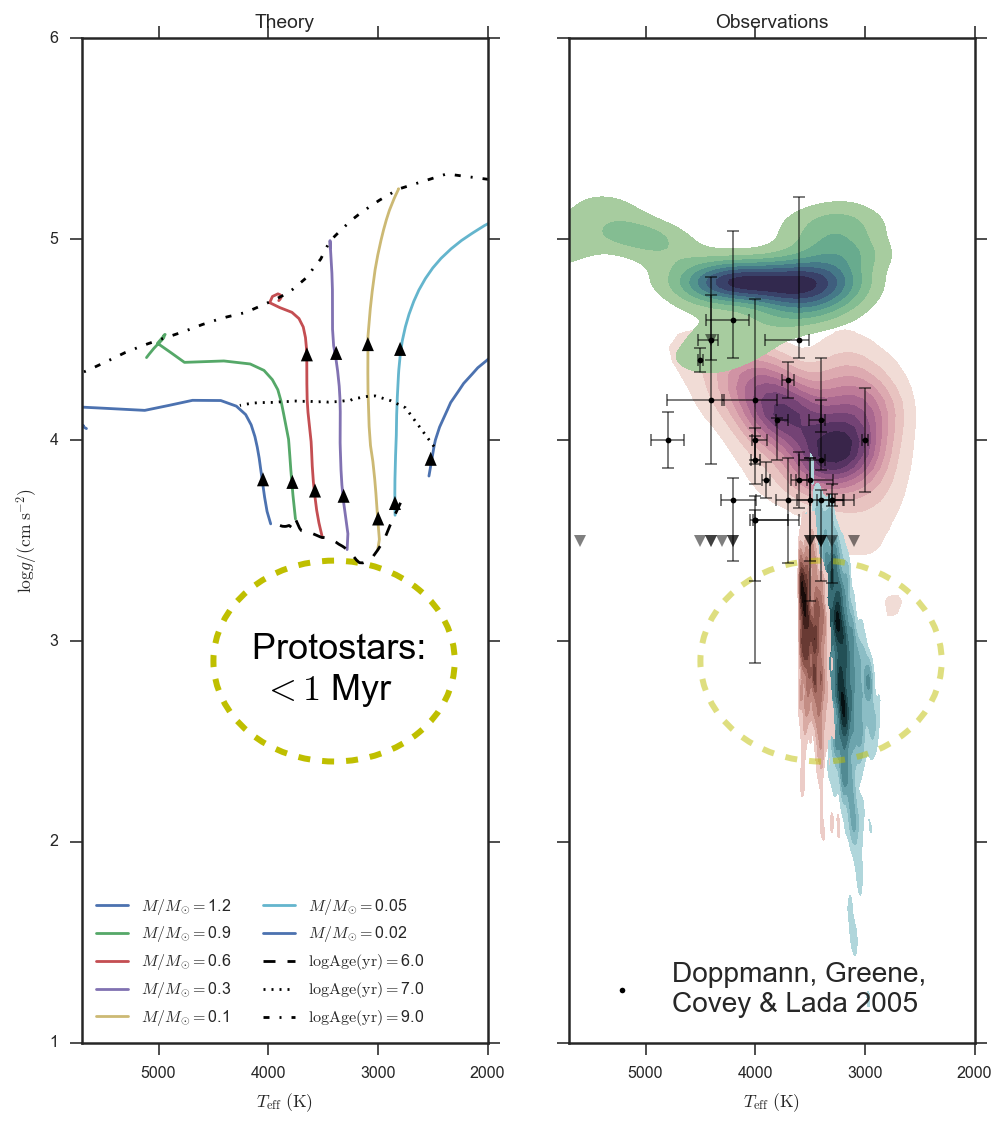

In [27]:
fig=plt.figure(figsize=(8, 9))
ax = fig.add_subplot(121)
for mass in [0.02, 0.05, 0.1, 0.3, 0.6, 0.9, 1.2][::-1]:
    ev = bcah.evtrack(mass,dage=0.01, minage=6.0, maxage=9.9)
    plt.plot((ev['Teff']),ev['logg'],'-', alpha=1.0, label = '$M/M_{\odot} = $'+'{}'.format(mass))

for age, ls in zip([6.0, 7.0, 8.0, 9.0, 9.9], ['k--', 'k:', 'k--', 'k-.', 'k-']):
    if age in np.array([6.0, 7.0, 9.0]):
        ev = bcah.isochrone(age, minm=0.02, maxm=1.2)
        plt.plot((ev['Teff']),ev['logg'], ls, label = '$\log{\mathrm{Age (yr)}} = $'+'{}'.format(age))

plt.xlabel('$T_\mathrm{eff}$ $\mathrm{(K)}$')
plt.ylabel('$\log{g/(\mathrm{cm \; s}^{-2})}}$')
plt.xlim(5700, 2000);
plt.ylim(1, 6.0);
plt.yticks(np.arange(1, 6.1, 1))
plt.xticks(np.arange(2000, 5001, 1000))

el = Ellipse(xy=(3400,2.9), width=2200.0, height=1.0, angle=0, facecolor='w', edgecolor='y', lw=3, linestyle='--')
ax.add_artist(el)

#ax.arrow(4800, 3.4, 0, 0.5, head_width=110, head_length=0.07, fc='k', ec='k', lw=2.7)
#plt.text(5100, 3.2, 'older', fontsize=14, color='k')

#ax.arrow(3000, 2.3, 500, 0.0, head_width=0.05, head_length=200, fc='k', ec='k', lw=2.7)
#plt.text(4000, 2.15, 'more massive', fontsize=14, color='k')

#plt.text(5250, 5.0, 'Mature stars \n $\sim 1000$ Myr', fontsize=18, color='k')
plt.text(4150, 2.7, 'Protostars: \n $<1$ Myr', fontsize=18, color='k')

plt.legend(loc='lower left', fontsize=8, ncol=2)
plt.title('Theory')

for mass in [0.02, 0.05, 0.1, 0.3, 0.6, 0.9, 1.2][::-1]:
    ev = bcah.evtrack(mass,dage=0.01, minage=6.0, maxage=9.9)
    gi = np.abs(ev.age - 6.3) < 0.005
    plt.arrow(ev['Teff'][gi].values[0],ev['logg'][gi].values[0], 0, 0.07, shape='full', lw=0, 
              length_includes_head=True, head_width=110, fc='k', ec='k', head_length=0.07, zorder=10)
    if mass in [0.05, 0.1, 0.3, 0.6]:
        gi = np.abs(ev.age - 7.3) < 0.005
        plt.arrow(ev['Teff'][gi].values[0],ev['logg'][gi].values[0], 0, 0.07, shape='full', lw=0, 
              length_includes_head=True, head_width=110, fc='k', ec='k', head_length=0.07, zorder=10)

ax2 = fig.add_subplot(122)

for cl, group in cott.groupby('Cluster'):
    sns.kdeplot(group['Teff'], group['log(g)'], shade=True, shade_lowest=False,
                cmap=color_dict[cl],
                label='Cottaar et al. 2014: {}'.format(cl))

mi = tbl3['f_log(g)'].isnull()
plt.plot(tbl3['Teff'][mi], tbl3['log(g)'][mi], 'k.',alpha=1.0, label='Doppmann, Greene, \nCovey & Lada 2005')

plt.legend(loc='lower left', ncol=2, fontsize=14)

plt.errorbar(tbl3['Teff'][mi], tbl3['log(g)'][mi], 
             xerr=Teff_err[:, mi.values], yerr=logg_err[:, mi.values], fmt='k.', alpha=0.5,
             barsabove=True, capthick=1, lw=1)
ui = tbl3['f_log(g)'].notnull()
plt.plot(tbl3['Teff'][ui], tbl3['log(g)'][ui], 'kv', alpha=0.5)

plt.xlabel('$T_\mathrm{eff}$ $\mathrm{(K)}$')
plt.ylabel('')
plt.xlim(5700, 2000);
plt.ylim(1, 6.0);
plt.yticks(np.arange(1, 6.1, 1))
plt.xticks(np.arange(2000, 5001, 1000))

sns.kdeplot(fc[:,0], fc[:,1], shade=True, shade_lowest=False, cmap=cmap)
sns.kdeplot(fc2[:,0], fc2[:,1], shade=True, shade_lowest=False, cmap=cmap2)

el = Ellipse(xy=(3400,2.9), width=2200.0, height=1.0, angle=0, facecolor='none', alpha=0.5, edgecolor='y', lw=3, linestyle='--')
ax2.add_artist(el)
plt.title('Observations')
ax2.axes.get_yaxis().set_ticklabels([])


plt.savefig('../plots/gully_Class0_Teff_logg_results.pdf')

Looks good.